### Multiple_Linear_Regression_model

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the dataset

In [2]:
df = pd.read_csv("Cars.csv")
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


### Check the rows and columns of the dataset by using "df.shape" method

In [3]:
df.shape

(36, 5)

In [4]:
df.columns

Index(['Car', 'Model', 'Volume', 'Weight', 'CO2'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C42C7716C8>,
      dtype=object)

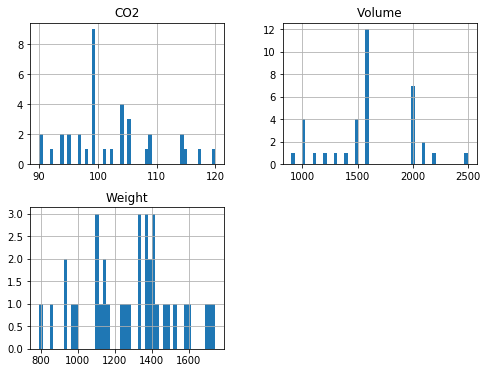

In [5]:
df.hist(bins = 50, figsize=(8, 6))

In [6]:
values_count = df["Weight"].value_counts()
values_count[:10]

1365    3
1415    2
1112    2
929     2
1150    1
1746    1
1405    1
1605    1
865     1
1160    1
Name: Weight, dtype: int64

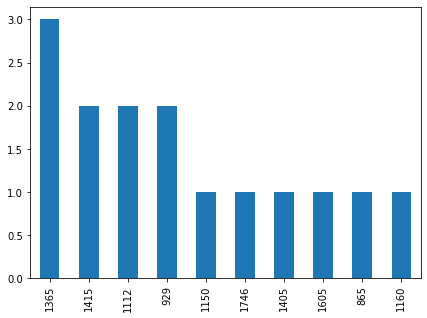

In [7]:
values_count[:10].plot(kind = "bar", figsize=(7, 5))

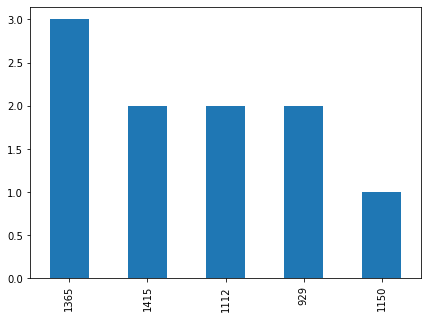

In [8]:
values_count[:5].plot(kind = "bar", figsize=(7,5))

### Handling Missing Data

In [9]:
missing_data = df.isnull()
missing_data

,Car,Model,Volume,Weight,CO2
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


### Check missing_data point per column

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Car
False    36
Name: Car, dtype: int64

Model
False    36
Name: Model, dtype: int64

Volume
False    36
Name: Volume, dtype: int64

Weight
False    36
Name: Weight, dtype: int64

CO2
False    36
Name: CO2, dtype: int64



### Baisc insight of the dataset



#### info


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


### Dscriptive Statistic

In [12]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [13]:
df.describe(include = "all")

,Car,Model,Volume,Weight,CO2
count,36,36,36.000000,36.000000,36.000000
unique,17,35,NaN,NaN,NaN
top,Mercedes,Fiesta,NaN,NaN,NaN
freq,5,2,NaN,NaN,NaN
mean,NaN,NaN,1611.111111,1292.277778,102.027778
std,NaN,NaN,388.975047,242.123889,7.454571
min,NaN,NaN,900.000000,790.000000,90.000000
25%,NaN,NaN,1475.000000,1117.250000,97.750000
50%,NaN,NaN,1600.000000,1329.000000,99.000000
75%,NaN,NaN,2000.000000,1418.250000,105.000000


In [14]:
df.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car,36,17,Mercedes,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,36,35,Fiesta,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volume,36,NaN,NaN,NaN,1611.11,388.975,900,1475,1600,2000,2500
Weight,36,NaN,NaN,NaN,1292.28,242.124,790,1117.25,1329,1418.25,1746
CO2,36,NaN,NaN,NaN,102.028,7.45457,90,97.75,99,105,120


### Corr

In [15]:
df.corr()

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


### dtypes

In [16]:
df.dtypes

Car       object
Model     object
Volume     int64
Weight     int64
CO2        int64
dtype: object

### Numerical Variable

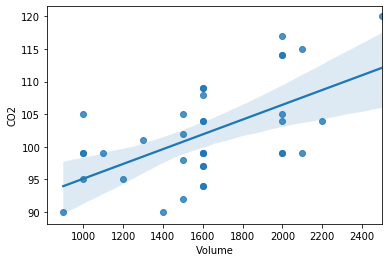

In [17]:
import seaborn as sns
%matplotlib inline
sns.regplot(x = "Volume", y = "CO2", data = df)

### Categorical Variable

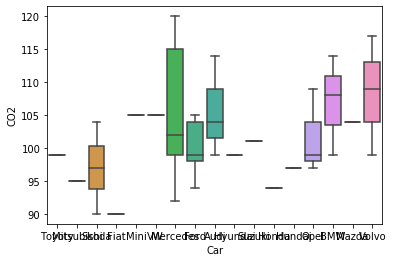

In [18]:
import seaborn as sns
%matplotlib inline
sns.boxplot(x = "Car", y = "CO2", data = df)

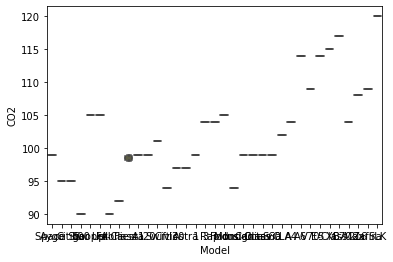

In [19]:
sns.boxplot(x = "Model", y = "CO2", data = df)

### Declare the column for the feature and target

In [20]:
features = ["Volume", "Weight"]

In [21]:
target = ["CO2"]

### Separate the features and the target into separate dataframe

In [22]:
X = df[features]

In [23]:
y = df[target]

In [24]:
print(X)

    Volume  Weight
0     1000     790
1     1200    1160
2     1000     929
3      900     865
4     1500    1140
5     1000     929
6     1400    1109
7     1500    1365
8     1500    1112
9     1600    1150
10    1100     980
11    1300     990
12    1000    1112
13    1600    1252
14    1600    1326
15    1600    1330
16    1600    1365
17    2200    1280
18    1600    1119
19    2000    1328
20    1600    1584
21    2000    1428
22    2100    1365
23    1600    1415
24    2000    1415
25    1500    1465
26    2000    1490
27    2000    1725
28    1600    1523
29    2000    1705
30    2100    1605
31    2000    1746
32    1600    1235
33    1600    1390
34    1600    1405
35    2500    1395


In [25]:
print(y)

    CO2
0    99
1    95
2    95
3    90
4   105
5   105
6    90
7    92
8    98
9    99
10   99
11  101
12   99
13   94
14   97
15   97
16   99
17  104
18  104
19  105
20   94
21   99
22   99
23   99
24   99
25  102
26  104
27  114
28  109
29  114
30  115
31  117
32  104
33  108
34  109
35  120


### Train the Multiple Linear Regression on the whole dataset

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regressor = LinearRegression()
regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
regressor.fit(X, df["CO2"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Find the intercept_

In [29]:
regressor.intercept_

79.6947192911594

### Find the coef_

In [30]:
regressor.coef_

array([0.00780526, 0.00755095])

In [31]:
yhat = regressor.predict(X)
yhat[0:5]

array([ 93.46522516,  97.82012716,  94.51480683,  93.25102045,
       100.01068547])

In [32]:
import seaborn as sns
%matplotlib inline

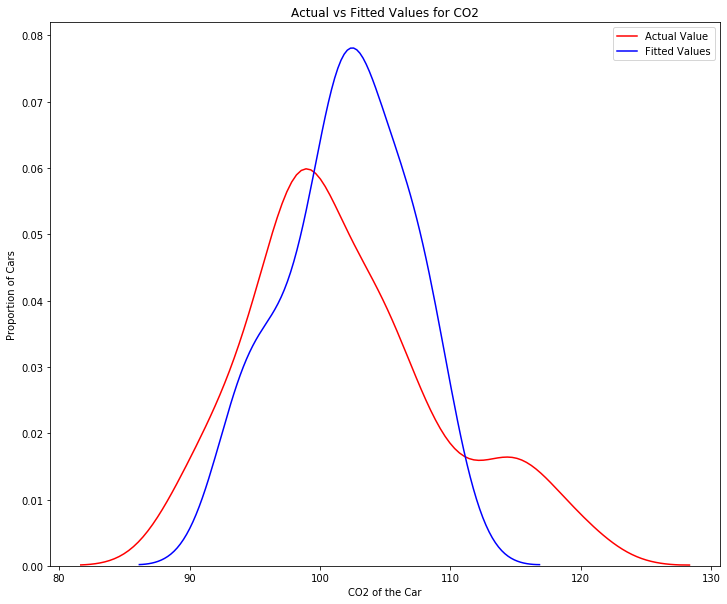

In [33]:
width = 12
height = 10


plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['CO2'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for CO2')
plt.xlabel('CO2 of the Car')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Measures for In-Sample Evaluation


##### Calculate the R_squared

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [35]:
#fit the model
regressor.fit(X,df["CO2"])
#find the R^2
print("The R-squared is :", regressor.score(X, df["CO2"]))

The R-squared is : 0.3765564043619989


### Let calculate MSE

In [36]:
y_predict_multifit = regressor.predict(X)
y_predict_multifit

array([ 93.46522516,  97.82012716,  94.51480683,  93.25102045,
       100.01068547,  94.51480683,  98.99608035, 101.70964861,
        99.79925895, 100.8667207 ,  95.6804309 ,  97.31699187,
        95.89663018, 101.63691732, 102.19568742, 102.22589121,
       102.49017436, 106.53149836, 100.63264133, 105.33289232,
       104.14383181, 106.08798705, 106.39280312, 102.86772172,
       105.98982473, 102.46474333, 106.55614578, 108.33061839,
       103.68322403, 108.17959944, 108.20503047, 108.48918828,
       101.50855121, 102.67894804, 102.79221225, 109.74143455])

### Let compare the predicted results with the actual results

In [37]:
print('The mean square error of CO2 and predicted value using multifit is: ', \
      mean_squared_error(df['CO2'], y_predict_multifit))

The mean square error of CO2 and predicted value using multifit is:  33.68279098995154


### Evaluate Multiple Linear Regression Accuracy using Root Mean Squared Error

In [38]:
from math import sqrt

In [39]:
RMSE = sqrt(mean_squared_error(df["CO2"], y_predict_multifit))
RMSE

5.803687706101315